## 25-04-2023

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\FX505DT\Downloads\Wage.csv")

data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


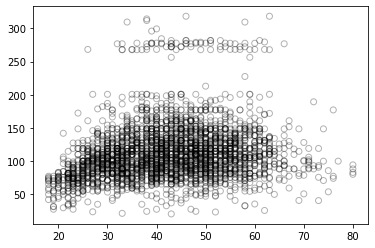

In [13]:
data_x = data["age"]
data_y = data["wage"]

plt.scatter(data_x, data_y,
            facecolor="None",edgecolor="k",alpha=0.3)

In [18]:
#Non-linear functions
import statsmodels.formula.api as smf
results = smf.ols("wage~age+np.power(age,2)+np.power(age,3)+np.power(age,4)",data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.77e-57
Time:                        08:37:34   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from statsmodels.stats.api import anova_lm

mod1 = smf.ols("wage~age",data=data).fit()
mod2= smf.ols("wage~age+np.power(age,2)",data=data).fit()
mod3= smf.ols("wage~age+np.power(age,2)+np.power(age,3)",data=data).fit()
mod4= smf.ols("wage~age+np.power(age,2)+np.power(age,3)+np.power(age,4)",data=data).fit()
mod5= smf.ols("wage~age+np.power(age,2)+np.power(age,3)+np.power(age,4)+np.power(age,5)",data=data).fit()

In [23]:
anova_lm(mod1,mod2,mod3,mod4,mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010101,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693660,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152118,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563016,0.804976,3.696820e-01


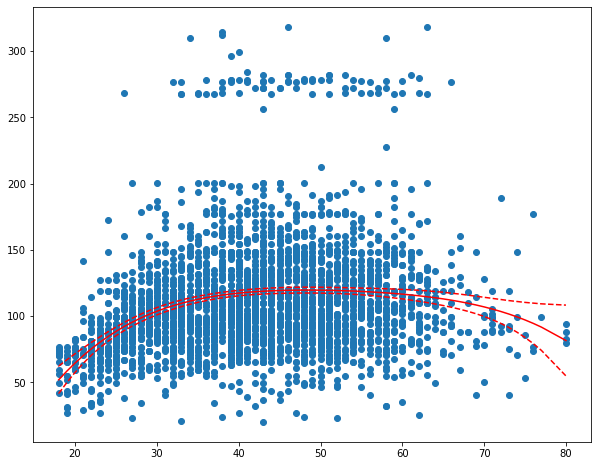

In [32]:
from statsmodels.stats.outliers_influence import summary_table

st,data, ss2 = summary_table(results, alpha= 0.05)

fittedvalues = data[:,2]
predict_mean_se = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

order = np.argsort(data_x.values.flatten())
x_o = data_x.values.flatten()[order]

plt.figure(figsize=(10,8))
plt.scatter(x_o,data_y[order])
plt.plot(x_o, fittedvalues[order],"r")
plt.plot(x_o, predict_mean_ci_low[order],"r--")
plt.plot(x_o, predict_mean_ci_upp[order],"r--")

In [34]:
#next non-linear method

df_cut, bins= pd.cut(data_x,4, retbins = True, right = True)
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [39]:
df_steps = pd.concat([data_x, df_cut, data_y],keys = ["age","age_cuts","wage"],axis=1)
df_steps_dumies = pd.get_dummies(df_cut)
df_steps_dumies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [51]:
df_steps_dumies.columns=["17.938=33.5","33.5-49.0","49.0-64.5","64.5-80.0"]

fit = sm.GLM(df_steps.wage, df_steps_dumies).fit()

xp = np.linspace(data_x.min(),data_x.max()-1,100)

bin_mapping = np.digitize(xp, bins)

X_valid = pd.get_dummies(bin_mapping)
pred = fit.predict(X_valid)

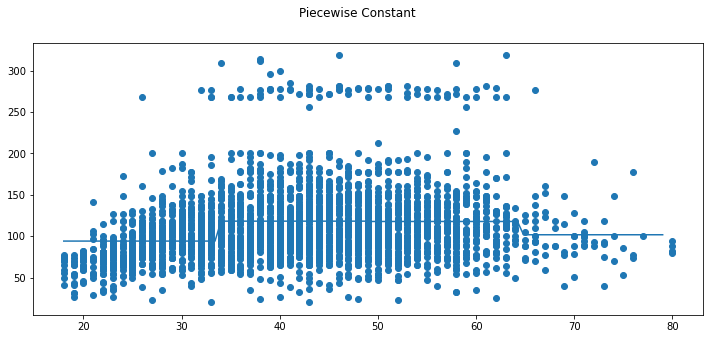

In [58]:
fig,(ax1)= plt.subplots(1,1,figsize=(12,5))
fig.suptitle("Piecewise Constant")

ax1.scatter(data_x,data_y)
ax1.plot(xp,pred)